**Importing libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as m
import scipy

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Section 1 (runkeeper)

**Importing data and pre visualization**

In [ ]:
data1 = pd.read_csv("RunningData.csv")
data1.head()

,Date,Activity Id,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged,Notes,GPX File
0,11/11/2018 14:05,c9627fed-14ac-47a2-bed3-2a2630c63c15,Running,NaN,10.44,58:40:00,5:37,10.68,774.0,130,159.0,NaN,NaN,2018-11-11-140512.gpx
1,11/9/2018 15:02,be65818d-a801-4847-a43b-2acdf4dc70e7,Running,NaN,12.84,1:14:12,5:47,10.39,954.0,168,159.0,NaN,NaN,2018-11-09-150235.gpx
2,11/4/2018 16:05,c09b2f92-f855-497c-b624-c196b3ef036c,Running,NaN,13.01,1:15:16,5:47,10.37,967.0,171,155.0,NaN,NaN,2018-11-04-160500.gpx
3,11/1/2018 14:03,bc9b612d-3499-43ff-b82a-9b17b71b8a36,Running,NaN,12.98,1:14:25,5:44,10.47,960.0,169,158.0,NaN,NaN,2018-11-01-140358.gpx
4,10/27/2018 17:01,972567b2-1b0e-437c-9e82-fef8078d6438,Running,NaN,13.02,1:12:50,5:36,10.73,967.0,170,154.0,NaN,NaN,2018-10-27-170136.gpx


**Plotting the data, based on the Normal Continuous Distribution**

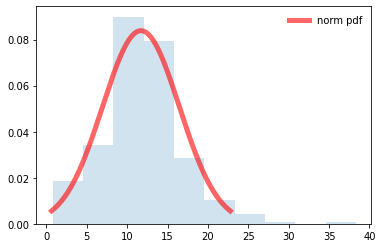

In [ ]:
from scipy.stats import norm

fig, ax = plt.subplots(1, 1)

#Filtering just by running activity
data1 = data1[data1.Type =="Running"]

#Data and parameters
distance = data1['Distance (km)']
mu, sig = distance.mean(), distance.std()
max_distance = distance.max()

#histogram
ax.hist(distance, density=True, histtype='stepfilled', alpha=0.2)

#Curve
x = np.linspace(norm.ppf(0.01, mu, sig), norm.ppf(0.99, mu, sig), 1000)
ax.plot(x, norm.pdf(x, mu, sig), 'r-', lw=5, alpha=0.6, label='norm pdf')
ax.legend(loc='best', frameon=False)
plt.show()

**The probability of running 10 km**

In [ ]:
print(norm.pdf(10, mu, sig))

0.07868314424727473


**This function integrates between the given intervals (a,b)**

In [ ]:
def normal_distribution_function(xx):
    value = scipy.stats.norm.pdf(xx,mu,sig)
    return value

**The probability of running more than 15 km**

In [ ]:
from scipy import integrate
res, err = integrate.quad(normal_distribution_function, 15.001, max_distance)
print('Probability x > {} ='.format(15),res)

Probability x > 15 = 0.24368097113650028


**Plotting the given interval**

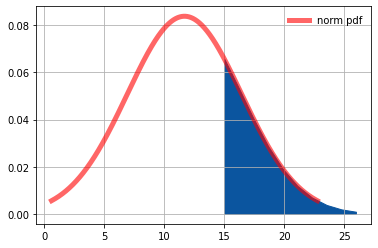

In [ ]:
fig, ax = plt.subplots(1, 1)

#99.7% of the data
x2 = mu + 3.0 * sig

#hatched area
ptx = np.linspace(15.01, x2, 10)
pty = scipy.stats.norm.pdf(ptx,mu,sig)
plt.fill_between(ptx, pty, color='#0b559f', alpha=1.0)
plt.grid()

#curve
x = np.linspace(norm.ppf(0.01, mu, sig), norm.ppf(0.99, mu, sig), 1000)
ax.plot(x, norm.pdf(x, mu, sig), 'r-', lw=5, alpha=0.6, label='norm pdf')
ax.legend(loc='best', frameon=False)

**Boxplot to see in general how data looks and how is distributed**

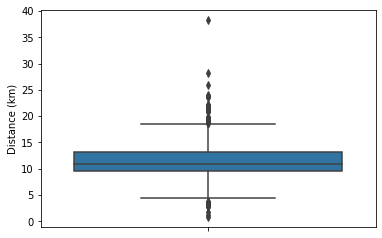

In [ ]:
sns.boxplot(y = distance)
plt.show()

We can appreciate that the IQR is small and there are some outliers, that denotes that the distance for running varies considerably between runners

**Distribution based on sigma distance (Graph)**



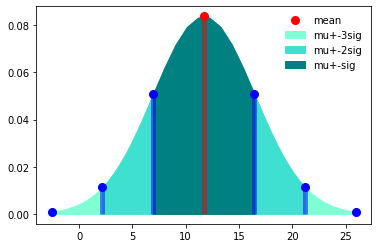

In [ ]:
fig, ax2 = plt.subplots(1, 1)
xmin3 = mu - 3 * sig
xmin2 = mu - 2 * sig
xmin1 = mu - 1 * sig
xplus3 = mu + 3 * sig
xplus2 = mu + 2 * sig
xplus1 = mu + 1 * sig
xarr = np.array([xmin3, xmin2, xmin1, xplus3, xplus2, xplus1])

#hatched area
ptx = np.linspace(xmin3, xmin2, 10)
pty = scipy.stats.norm.pdf(ptx,mu,sig)
plt.fill_between(ptx, pty, color='aquamarine', alpha=1.0,label='mu+-3sig')
plt.grid()

ptx = np.linspace(xplus2, xplus3, 10)
pty = scipy.stats.norm.pdf(ptx,mu,sig)
plt.fill_between(ptx, pty, color='aquamarine', alpha=1.0)
plt.grid()

ptx = np.linspace(xmin2, xmin1, 10)
pty = scipy.stats.norm.pdf(ptx,mu,sig)
plt.fill_between(ptx, pty, color='turquoise', alpha=1.0)
plt.grid()

ptx = np.linspace(xplus1, xplus2, 10)
pty = scipy.stats.norm.pdf(ptx,mu,sig)
plt.fill_between(ptx, pty, color='turquoise', alpha=1.0, label='mu+-2sig')
plt.grid()

ptx = np.linspace(xmin1, xplus1, 10)
pty = scipy.stats.norm.pdf(ptx,mu,sig)
plt.fill_between(ptx, pty, color='teal', alpha=1.0, label='mu+-sig')


#vlines mean +- std
yarr = norm.pdf(xarr, mu,sig)
ax2.plot(xarr, yarr, 'co',color='blue', ms=8)
ax2.vlines(xarr, 0, yarr, color='blue',lw=5, alpha=0.5)

#vlines means
ax2.plot(mu, norm.pdf(mu, mu,sig), 'co',color='red', ms=8, label='mean')
ax2.vlines(mu, 0, norm.pdf(mu, mu,sig), color='red',lw=5, alpha=0.5)
ax2.legend(loc='best', frameon=False)

**Percentage of people that may be able to run half marathon**

In [ ]:
print(1-norm.cdf(21.097 , mu, sig))

0.0240922976814274


**Percentage of people that may be able to run a marathon**

In [ ]:
print(1-norm.cdf(42.1, mu, sig))

8.292133646392585e-11


**Quantiles**

In [ ]:
print(distance.quantile(0.25))
print(distance.quantile(0.75))

9.55
13.190000000000001


**Mean**

In [ ]:
print(distance.mean())

11.69655773420479


**Conclusions**

Based on the analysis, we can conclude that the runners in this application has all level of expertise in running because, the distance that each of them can achive can vary a lot from person to person, so in that aspect we can think that the app is used for hobby, practice, health and for High performance athletes. Based on the training on the app we can conclude that about 2.4% of this users are able to run a half marathon and in order to run a complete marathon they should train more. Based on quantiles we can find that central 50% of people run between 9.55 km and 13.20 km. Finally, it is neccesary to mention that the average distance that people can run is 11.70 km.
I also found that the probability of running exactly 10km is around 8% and the probability of running more than 15 km is about 24%.

# Section 2 (Traffic Accidents)

Due to the nature of the objective statistic ***Cantidad de accidentes Diarios***, we can identify the following:


1.   The statistic is part of the discrete probability distributions.
2.   The statistic fits perfect and only with the poisson probability distribution because we want to find the number of results (traffic accidents) that occur in certain interval of time (day).


**Data management and pre-visualization**

In [ ]:
data2 = pd.read_excel('Accidentalidad_en_Barranquilla.xls', index_col=0)
data = data2.drop(['DIA_ACCIDENTE', 'GRAVEDAD_ACCIDENTE','CLASE_ACCIDENTE','SITIO_EXACTO_ACCIDENTE','CANT_HERIDOS_EN _SITIO_ACCIDENTE','CANT_MUERTOS_EN _SITIO_ACCIDENTE','AÑO_ACCIDENTE','MES_ACCIDENTE'], axis=1)
data.head()
#We can see that we have to group by day in the column "FECHA_ACCIDENTE" and that we are just going to some columns, so we drop the ones we are not going to use.

,HORA_ACCIDENTE,CANTIDAD_ACCIDENTES
FECHA_ACCIDENTE,,
2015-01-01,02:10:00:PM,1
2015-01-01,02:15:00:PM,1
2015-01-01,02:20:00:PM,1
2015-01-01,03:30:00:PM,1
2015-01-01,04:20:00:AM,1


**Plotting data based on the probability distribution**

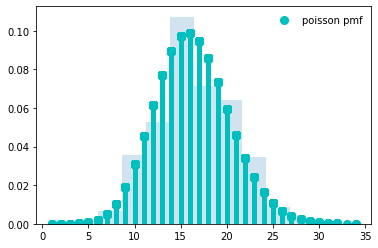

In [ ]:
from scipy.stats import poisson
fig, ax = plt.subplots(1, 1)
accidents_by_day = data.groupby(['FECHA_ACCIDENTE'])
sums = accidents_by_day['CANTIDAD_ACCIDENTES'].sum()
mu2 = sums.mean()
max = sums.max()

#vlines
x2 = sums.values
ax.plot(x2, poisson.pmf(x2, mu2), 'co', ms=8, label='poisson pmf')
ax.vlines(x2, 0, poisson.pmf(x2, mu2), colors='c', lw=5, alpha=0.5)

#histogram
x_rv = poisson.rvs(mu2, size=1000)
ax.hist(x_rv, density=True, alpha=0.2)
ax.legend(loc='best', frameon=False)

**This function finds the probability of the random variable to be in a given interval**

In [ ]:
def probability_function2(left,right):
  fx = 0
  for i in range(left, right):
    fx = fx + pow(m.e,-1*mu2) * pow(mu2,i)/(m.factorial(i))
  print(fx)

**The probability of fewer than 10 accidents daily**

In [ ]:
probability_function2(0,10)

0.03780620451822797


**The probability of more than 15 accidents daily**

In [ ]:
probability_function2(16,max+1)
#print(1-poisson.cdf(15,mu2))

0.5601090513458935


**Violin graph**

We use it to appreciate the distribution of the data

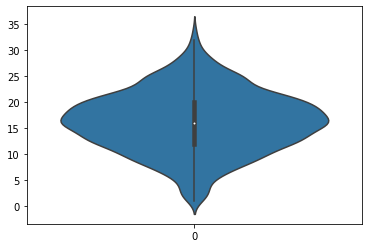

In [ ]:
sns.violinplot(data=x2)
plt.show()

**Analysis of probability distribution for the variable "cantidad de accidentes En Un Intervalo De Dos Horas" with th contraints from 6:00 am to 6:00 pm** 


Based on the data, the context and the problem, i can find that the random variable mentioned before follows a poisson distribution, the difference between the last Random Variable and this are the limit hours and the grouping by two hours.

*In the next code cell i will group by two continuous hours, between 6:00 AM to 6:00 PM*

In [ ]:
vector = np.zeros(7)
pos = -1
for event in data.values:
  dato = event[0]
  cant = event[1]
  time = dato[len(dato)-2:len(dato)]
  number = int(dato[0:2])
  if time == 'AM':
    if number >= 6:
      if number ==  6 or number == 7:
        pos = 0
      elif number == 8 or number == 9:
        pos = 1
      elif number == 10 or number == 11:
        pos = 2
      vector[pos] = vector[pos] + cant
  elif time == 'PM':
    if number <= 6 or number == 12:
      if number == 12 or number == 1:
        pos = 3
      elif number ==  2 or number == 3:
        pos = 4
      elif number == 4 or number == 5:
        pos = 5
        if number == 5:
          vector[pos] = vector[pos] + cant
      if number == 5 or number == 6:
        pos = 6
      vector[pos] = vector[pos] + cant

**Graph for the intervals of two hours between 6:00 AM to 6:00 PM**

[2967. 3853. 4029. 4559. 4233. 4415. 4142.]


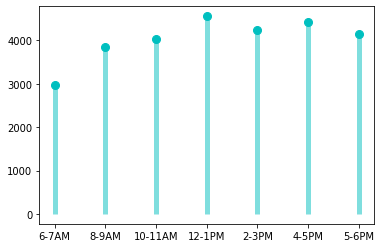

In [ ]:
fig, ax = plt.subplots(1, 1)
print(vector)
#vlines
prueba =['6-7AM','8-9AM','10-11AM','12-1PM','2-3PM','4-5PM','5-6PM']
ax.plot(prueba, vector, 'co', ms=8, label='poisson pmf')
ax.vlines(prueba, 0, vector, colors='c', lw=5, alpha=0.5)

**Mean**

In [ ]:
print(x2.mean())

16.273556231003038


**Minimun and maximun traffic accidents in a day**

In [ ]:
print("Minimun: ",x2.min())
print("Maximun: ",x2.max())

Minimun:  1
Maximun:  34


**Conclusions**

Based on the data analysis, we found that from 2015 to 2020 there are about 16 traffic accidents daily in Barranquilla, the interval which has the lowest accident rate between 6:00 AM to 6:59 PM is from 06:00 AM to 07:59 AM, the reason may be because at that time most people is slepping or in their house before going to work, school, universities, etc. So the fewer cars on the road, the less accident rate tends to be. 
In these almost 5 years, in the day with the minimun accidents there was one accident and the day with most accidents there were 34 of these events. On the other hand we can see that from 12:00M to 1:59 PM is the interval were more accidents occurs, this might be because most people is going and coming for lunch and the given time for lunch is usually short so they need to drive faster to get to the destination.
I also found that the probability for having less than 10 accidents in a day is around 4% and the probability of having more than 15 accidents daily is about 56%.